In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import bars
import c
import d
import microstructure
import signals

# Volume Probability of Informed Trading

<AxesSubplot:xlabel='Date'>

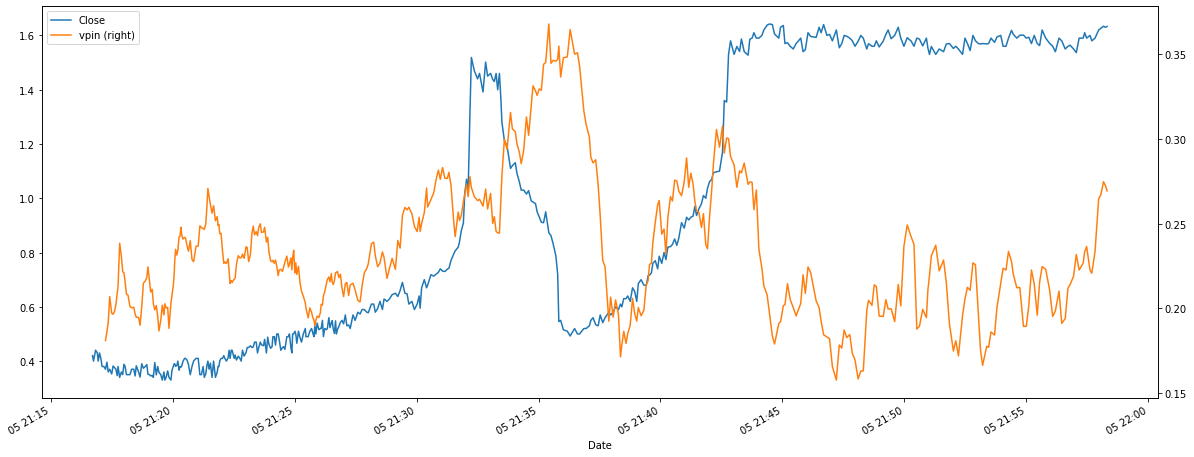

In [3]:
plt.rcParams["figure.figsize"] = (20, 8)

trade_data = d.fetch("data/tick", "trade.csv")
trade_data["dir"] = trade_data["Aggressor"].apply(
    lambda x: c.Dir.B if x == "BUY" else c.Dir.S
)
trade_data["Close"] = trade_data["Dv"] / trade_data["Volume"]
trade_data["dv"] = trade_data["Dv"]


def apply(groups, bars):
    bars["buy_volume"] = groups.apply(
        lambda x: (x["dir"].clip(lower=0) * x["Volume"]).sum()
    )
    return bars


mean_5s_volume = np.mean(trade_data.resample("5s")["Volume"].sum())
volume_bars = bars.create_volume_bars(trade_data, mean_5s_volume, apply=apply)

volume_bars["vpin"] = microstructure.volume_probability_of_informed_trading(
    volume_bars, window="2min", min_periods=10
)
volume_bars[["Close", "vpin"]].plot(secondary_y="vpin")

<AxesSubplot:xlabel='Date'>

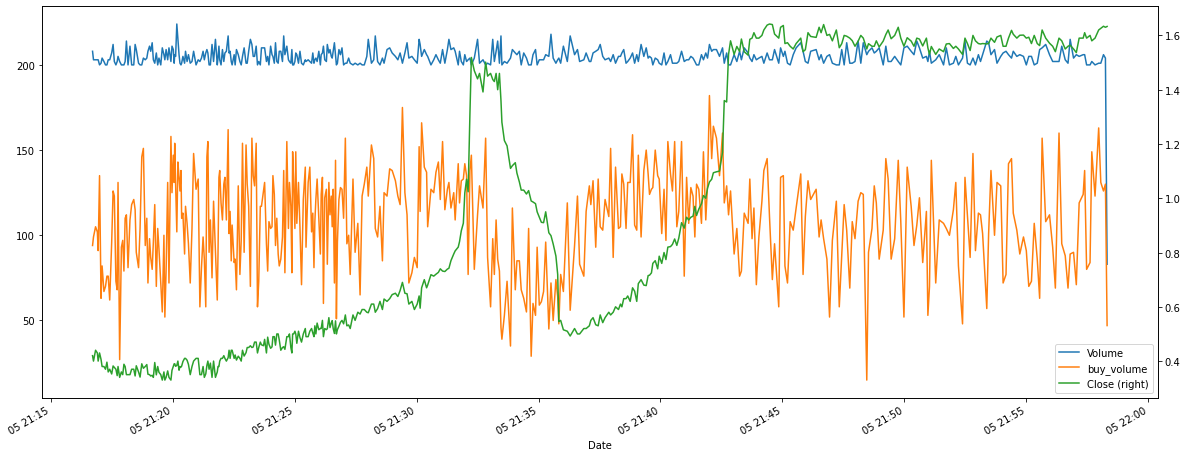

In [4]:
volume_bars[["Volume", "buy_volume", "Close"]].plot(secondary_y="Close")